In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Advertising_Cost_Prediction.csv.txt')
df.head()

,Ad_ID,Platform,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
0,9c40a73a-3c60-40da-bcfb-6805731351a6,Facebook,3289.147025,24027.0,4175,0.031573,1.076315,0.192657,7934.748438,980698
1,e94253c6-4d8f-4168-8bfc-af107d7fb8a5,Google,NaN,4117.0,2447,0.087169,1.172735,0.061385,8226.806373,122243
2,614e78f2-5a75-4799-b96d-54e15f5477c5,Twitter,3897.725788,24723.0,2681,0.094179,1.822746,0.051879,15512.490513,190906
3,46d10728-a134-4650-83b0-0921a5b69e3d,Instagram,2551.720676,41015.0,4903,0.074535,4.945098,0.135383,15950.687160,473730
4,2025ff49-efe5-4362-8010-0da1cbb55947,Twitter,2885.412375,4714.0,3950,0.076786,4.394837,0.199278,11181.975793,639844


In [3]:
df.drop(columns=['Platform', 'Ad_ID'], inplace=True)
df

,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
0,3289.147025,24027.0,4175,0.031573,1.076315,0.192657,7934.748438,980698
1,NaN,4117.0,2447,0.087169,1.172735,0.061385,8226.806373,122243
2,3897.725788,24723.0,2681,0.094179,1.822746,0.051879,15512.490513,190906
3,2551.720676,41015.0,4903,0.074535,4.945098,0.135383,15950.687160,473730
4,2885.412375,4714.0,3950,0.076786,4.394837,0.199278,11181.975793,639844
...,...,...,...,...,...,...,...,...
895,2111.151552,15280.0,3847,0.044973,3.744802,0.027028,12077.617238,386588
896,2409.256525,11506.0,2111,0.048589,3.941271,0.136222,9724.347803,885938
897,4015.999400,8084.0,2955,0.081803,4.341463,0.042177,7053.618504,610693
898,2024.361002,11179.0,1251,0.090030,3.845435,0.068033,15933.346978,205146


In [5]:
num_columns = ['Ad_Spend','Impressions','Revenue']
df[num_columns] = df[num_columns].fillna(df[num_columns].median())
df

,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
0,3289.147025,24027.0,4175,0.031573,1.076315,0.192657,7934.748438,980698
1,2993.487071,4117.0,2447,0.087169,1.172735,0.061385,8226.806373,122243
2,3897.725788,24723.0,2681,0.094179,1.822746,0.051879,15512.490513,190906
3,2551.720676,41015.0,4903,0.074535,4.945098,0.135383,15950.687160,473730
4,2885.412375,4714.0,3950,0.076786,4.394837,0.199278,11181.975793,639844
...,...,...,...,...,...,...,...,...
895,2111.151552,15280.0,3847,0.044973,3.744802,0.027028,12077.617238,386588
896,2409.256525,11506.0,2111,0.048589,3.941271,0.136222,9724.347803,885938
897,4015.999400,8084.0,2955,0.081803,4.341463,0.042177,7053.618504,610693
898,2024.361002,11179.0,1251,0.090030,3.845435,0.068033,15933.346978,205146


In [8]:
from sklearn.preprocessing import MinMaxScaler
num_columns = ['Ad_Spend','Impressions','Revenue','Clicks','CPC','Target_Audience_Size']
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df

,Ad_Spend,Impressions,Clicks,CTR,CPC,Conversion_Rate,Revenue,Target_Audience_Size
0,0.571806,0.468721,0.831699,0.031573,0.198137,0.192657,0.194140,0.978864
1,0.497453,0.060754,0.478758,0.087169,0.217846,0.061385,0.213706,0.024123
2,0.724852,0.482983,0.526552,0.094179,0.350715,0.051879,0.701800,0.100487
3,0.386357,0.816815,0.980392,0.074535,0.988955,0.135383,0.731157,0.415034
4,0.470274,0.072987,0.785743,0.076786,0.876476,0.199278,0.411684,0.599779
...,...,...,...,...,...,...,...,...
895,0.275562,0.289490,0.764706,0.044973,0.743603,0.027028,0.471686,0.318117
896,0.350530,0.212159,0.410131,0.048589,0.783763,0.136222,0.314032,0.873476
897,0.754595,0.142040,0.582516,0.081803,0.865566,0.042177,0.135110,0.567359
898,0.253736,0.205459,0.234477,0.090030,0.764173,0.068033,0.729995,0.116324


In [12]:
X = df.drop('Ad_Spend', axis=1) # -- independent variable
y = df['Ad_Spend']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
linreg_pred = linreg_model.predict(X_test)

In [21]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)


In [23]:
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)


In [24]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07512304248535592
Mean Absolute Error: 0.2242352507661977
R-squared: -0.0390065046190442


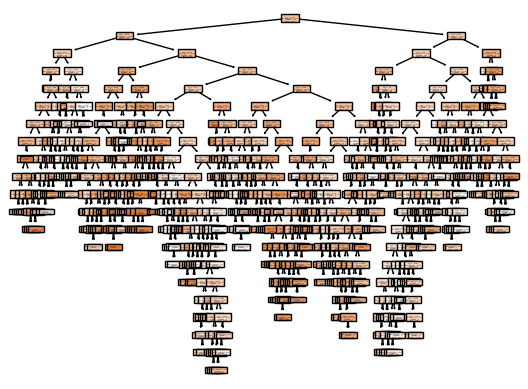

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [40]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.07786745560816999
Mean Absolute Error: 0.2324646828273211
R-squared: -0.07696374106246351


In [41]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [42]:
import pickle
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
